In [8]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import tensorflow
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
allData = pd.read_csv('../feature_data/features.csv')
allData.replace([np.inf, -np.inf], np.nan, inplace=True)
allData = allData.dropna()
X = allData.drop(["label"],axis=1)
X = X.drop(["radius"],axis=1)
cols = X.keys()

#normalize data
X = preprocessing.normalize(X, norm='max')

#labels
y = allData["label"]

#features
X = pd.DataFrame(X, columns = cols)

X['label'] = y


X = pd.DataFrame(X, columns = cols)


In [3]:
X.describe()

,num_points,std,avg_median_dev,width,linearity,circularity,boundary_length,boundary_regularity,mean_curvature,ang_diff,iav,std_iav,distance,dist_num_points,occluded_right,occluded_left
count,9.396000e+03,9.396000e+03,9.396000e+03,9.396000e+03,9396.000000,9.396000e+03,9.396000e+03,9.396000e+03,9.396000e+03,9.396000e+03,9.396000e+03,9.396000e+03,9.396000e+03,9.396000e+03,9396.000000,9396.000000
mean,6.592945e-01,6.469054e-03,5.388365e-03,1.869667e-02,0.212086,4.715495e-03,2.203596e-02,1.114649e-03,6.175379e-01,1.085435e-01,1.252896e-01,8.838433e-02,1.888061e-01,3.313430e-02,0.041433,0.036861
std,2.947262e-01,5.389933e-03,4.414308e-03,1.593319e-02,0.343588,1.037735e-02,1.710205e-02,1.707077e-03,4.030051e-01,8.850316e-02,1.010140e-01,1.059230e-01,2.651925e-01,6.744615e-02,0.051378,0.049779
min,7.593130e-12,9.689593e-14,8.191696e-14,3.366186e-13,0.000002,2.989823e-16,3.450850e-13,1.038421e-15,3.767210e-13,2.347074e-13,2.275342e-13,3.540904e-14,3.185288e-13,3.185288e-15,0.000000,0.000000
25%,3.818526e-01,1.964611e-03,1.628739e-03,5.193382e-03,0.000661,1.577377e-05,6.820499e-03,1.308422e-04,1.983662e-01,3.803375e-02,4.086856e-02,7.660437e-03,2.580247e-02,3.363338e-04,0.003488,0.000000
50%,5.995796e-01,5.012774e-03,4.451575e-03,1.344239e-02,0.012490,1.213275e-04,1.954216e-02,3.336329e-04,8.379153e-01,7.951023e-02,9.744967e-02,4.729005e-02,6.083608e-02,4.715807e-03,0.021248,0.018704
75%,1.000000e+00,8.546740e-03,6.921655e-03,2.601469e-02,0.305077,2.446431e-03,2.833060e-02,1.351564e-03,1.000000e+00,1.566307e-01,1.849632e-01,1.263992e-01,2.439817e-01,2.753039e-02,0.057476,0.052632
max,1.000000e+00,3.761725e-02,2.864450e-02,9.636622e-02,1.000000,2.029896e-01,1.076028e-01,2.576283e-02,1.000000e+00,4.486400e-01,6.176940e-01,1.000000e+00,1.000000e+00,3.333343e-01,0.333333,0.333333


<AxesSubplot:>

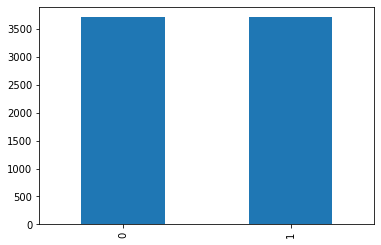

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
y_train.value_counts().plot.bar()


#oversample the minority
ros = RandomOverSampler(sampling_strategy="minority")
X_train, y_train = ros.fit_resample(X_train, y_train)

y_train.value_counts().plot.bar()

In [10]:
def CNN_Model(filters1 = 32, filters2=64, kernel_size=3,strides=1, pool_size=4, optimizer = 'adam'):
    model = models.Sequential()
    model.add(layers.Conv1D(filters=filters1, kernel_size=kernel_size, strides=strides, activation='relu',input_shape=(16,1)))
    model.add(layers.MaxPooling1D(pool_size=pool_size,strides=strides))
    model.add(layers.Conv1D(filters=filters2, kernel_size=kernel_size, strides=strides, activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2))
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model
    

In [11]:
ms = []
hs = []
for p in [3,4,5]:
    for k in [4,6]:
        for s in [1]:
            if not (s==2 and k==4):
                print(k)
                print(s)
                model = CNN_Model(filters1=64, filters2 = 64,kernel_size=k,strides=s, pool_size=p)
                model.summary()
                ms.append(model)
                history = model.fit(X_train, y_train, epochs=150, 
                                validation_data=(X_val, y_val))
                hs.append(history)


4
1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 13, 64)            320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 64)             16448     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                  

232/232 [==============================] - 1s 3ms/step - loss: 0.1390 - accuracy: 0.9470 - val_loss: 0.1341 - val_accuracy: 0.9510
Epoch 50/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1417 - accuracy: 0.9460 - val_loss: 0.1354 - val_accuracy: 0.9494
Epoch 51/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1407 - accuracy: 0.9455 - val_loss: 0.1424 - val_accuracy: 0.9457
Epoch 52/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1388 - accuracy: 0.9459 - val_loss: 0.1477 - val_accuracy: 0.9415
Epoch 53/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1345 - accuracy: 0.9489 - val_loss: 0.1362 - val_accuracy: 0.9478
Epoch 54/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1335 - accuracy: 0.9467 - val_loss: 0.1454 - val_accuracy: 0.9425
Epoch 55/150
232/232 [==============================] - 1s 4ms/step - loss: 0.1347 - accuracy: 0.9470 - val_loss: 0.1329 - val_accuracy: 0.9494
Epoch

Epoch 106/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9655 - val_loss: 0.1337 - val_accuracy: 0.9558
Epoch 107/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0924 - accuracy: 0.9653 - val_loss: 0.1295 - val_accuracy: 0.9569
Epoch 108/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0902 - accuracy: 0.9669 - val_loss: 0.1274 - val_accuracy: 0.9574
Epoch 109/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0893 - accuracy: 0.9653 - val_loss: 0.1351 - val_accuracy: 0.9569
Epoch 110/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0946 - accuracy: 0.9651 - val_loss: 0.1278 - val_accuracy: 0.9590
Epoch 111/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0895 - accuracy: 0.9679 - val_loss: 0.1410 - val_accuracy: 0.9574
Epoch 112/150
232/232 [==============================] - 1s 6ms/step - loss: 0.0876 - accuracy: 0.9674 - val_loss: 0.1412 - val_ac

Epoch 4/150
232/232 [==============================] - 1s 4ms/step - loss: 0.2902 - accuracy: 0.8776 - val_loss: 0.2747 - val_accuracy: 0.8925
Epoch 5/150
232/232 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.8837 - val_loss: 0.2928 - val_accuracy: 0.8866
Epoch 6/150
232/232 [==============================] - 1s 4ms/step - loss: 0.2530 - accuracy: 0.8984 - val_loss: 0.2264 - val_accuracy: 0.9095
Epoch 7/150
232/232 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.8985 - val_loss: 0.2127 - val_accuracy: 0.9117
Epoch 8/150
232/232 [==============================] - 1s 3ms/step - loss: 0.2327 - accuracy: 0.9056 - val_loss: 0.2058 - val_accuracy: 0.9159
Epoch 9/150
232/232 [==============================] - 1s 3ms/step - loss: 0.2199 - accuracy: 0.9145 - val_loss: 0.2288 - val_accuracy: 0.9095
Epoch 10/150
232/232 [==============================] - 1s 4ms/step - loss: 0.2252 - accuracy: 0.9120 - val_loss: 0.1964 - val_accuracy: 0.914

Epoch 61/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1285 - accuracy: 0.9510 - val_loss: 0.1499 - val_accuracy: 0.9425
Epoch 62/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1306 - accuracy: 0.9495 - val_loss: 0.1320 - val_accuracy: 0.9510
Epoch 63/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.9498 - val_loss: 0.1421 - val_accuracy: 0.9489
Epoch 64/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1242 - accuracy: 0.9513 - val_loss: 0.1304 - val_accuracy: 0.9500
Epoch 65/150
232/232 [==============================] - 1s 4ms/step - loss: 0.1275 - accuracy: 0.9479 - val_loss: 0.1528 - val_accuracy: 0.9452
Epoch 66/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1235 - accuracy: 0.9509 - val_loss: 0.1521 - val_accuracy: 0.9478
Epoch 67/150
232/232 [==============================] - 1s 4ms/step - loss: 0.1218 - accuracy: 0.9532 - val_loss: 0.1405 - val_accuracy:

Epoch 118/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9688 - val_loss: 0.1458 - val_accuracy: 0.9569
Epoch 119/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0849 - accuracy: 0.9687 - val_loss: 0.1349 - val_accuracy: 0.9596
Epoch 120/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0919 - accuracy: 0.9652 - val_loss: 0.1297 - val_accuracy: 0.9611
Epoch 121/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0880 - accuracy: 0.9687 - val_loss: 0.1543 - val_accuracy: 0.9510
Epoch 122/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.9684 - val_loss: 0.1685 - val_accuracy: 0.9505
Epoch 123/150
232/232 [==============================] - 1s 4ms/step - loss: 0.0849 - accuracy: 0.9700 - val_loss: 0.1426 - val_accuracy: 0.9574
Epoch 124/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0823 - accuracy: 0.9699 - val_loss: 0.1383 - val_ac

Epoch 16/150
232/232 [==============================] - 1s 3ms/step - loss: 0.2128 - accuracy: 0.9159 - val_loss: 0.1877 - val_accuracy: 0.9292
Epoch 17/150
232/232 [==============================] - 1s 3ms/step - loss: 0.2090 - accuracy: 0.9178 - val_loss: 0.1826 - val_accuracy: 0.9202
Epoch 18/150
232/232 [==============================] - 1s 3ms/step - loss: 0.2100 - accuracy: 0.9168 - val_loss: 0.2131 - val_accuracy: 0.9170
Epoch 19/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1989 - accuracy: 0.9193 - val_loss: 0.1754 - val_accuracy: 0.9276
Epoch 20/150
232/232 [==============================] - 1s 4ms/step - loss: 0.1982 - accuracy: 0.9226 - val_loss: 0.1853 - val_accuracy: 0.9239
Epoch 21/150
232/232 [==============================] - 1s 4ms/step - loss: 0.1960 - accuracy: 0.9235 - val_loss: 0.1703 - val_accuracy: 0.9303
Epoch 22/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1891 - accuracy: 0.9244 - val_loss: 0.1751 - val_accuracy:

Epoch 73/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1267 - accuracy: 0.9540 - val_loss: 0.1506 - val_accuracy: 0.9462
Epoch 74/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1258 - accuracy: 0.9528 - val_loss: 0.1358 - val_accuracy: 0.9505
Epoch 75/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1252 - accuracy: 0.9543 - val_loss: 0.1372 - val_accuracy: 0.9473
Epoch 76/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1235 - accuracy: 0.9545 - val_loss: 0.1333 - val_accuracy: 0.9537
Epoch 77/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1245 - accuracy: 0.9525 - val_loss: 0.1621 - val_accuracy: 0.9324
Epoch 78/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1298 - accuracy: 0.9537 - val_loss: 0.1287 - val_accuracy: 0.9548
Epoch 79/150
232/232 [==============================] - 1s 4ms/step - loss: 0.1225 - accuracy: 0.9516 - val_loss: 0.1268 - val_accuracy:

Epoch 130/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9669 - val_loss: 0.1412 - val_accuracy: 0.9574
Epoch 131/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9674 - val_loss: 0.1725 - val_accuracy: 0.9500
Epoch 132/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9698 - val_loss: 0.1249 - val_accuracy: 0.9590
Epoch 133/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.9679 - val_loss: 0.1246 - val_accuracy: 0.9611
Epoch 134/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0920 - accuracy: 0.9675 - val_loss: 0.1303 - val_accuracy: 0.9596
Epoch 135/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9651 - val_loss: 0.1208 - val_accuracy: 0.9601
Epoch 136/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9642 - val_loss: 0.1457 - val_ac

Epoch 28/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1654 - accuracy: 0.9344 - val_loss: 0.1578 - val_accuracy: 0.9377
Epoch 29/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1636 - accuracy: 0.9365 - val_loss: 0.1787 - val_accuracy: 0.9250
Epoch 30/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.1540 - val_accuracy: 0.9351
Epoch 31/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1614 - accuracy: 0.9359 - val_loss: 0.1635 - val_accuracy: 0.9361
Epoch 32/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1562 - accuracy: 0.9382 - val_loss: 0.1621 - val_accuracy: 0.9431
Epoch 33/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1512 - accuracy: 0.9414 - val_loss: 0.2388 - val_accuracy: 0.9170
Epoch 34/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1537 - accuracy: 0.9398 - val_loss: 0.1604 - val_accuracy:

Epoch 85/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1080 - accuracy: 0.9593 - val_loss: 0.1258 - val_accuracy: 0.9564
Epoch 86/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9613 - val_loss: 0.1363 - val_accuracy: 0.9510
Epoch 87/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1089 - accuracy: 0.9598 - val_loss: 0.1278 - val_accuracy: 0.9526
Epoch 88/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1047 - accuracy: 0.9622 - val_loss: 0.1293 - val_accuracy: 0.9558
Epoch 89/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1090 - accuracy: 0.9613 - val_loss: 0.1448 - val_accuracy: 0.9393
Epoch 90/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1022 - accuracy: 0.9613 - val_loss: 0.1203 - val_accuracy: 0.9574
Epoch 91/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.9625 - val_loss: 0.1521 - val_accuracy:

232/232 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.9700 - val_loss: 0.1321 - val_accuracy: 0.9590
Epoch 142/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9700 - val_loss: 0.1328 - val_accuracy: 0.9590
Epoch 143/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9726 - val_loss: 0.1602 - val_accuracy: 0.9478
Epoch 144/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9687 - val_loss: 0.1432 - val_accuracy: 0.9564
Epoch 145/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9750 - val_loss: 0.1447 - val_accuracy: 0.9580
Epoch 146/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0812 - accuracy: 0.9699 - val_loss: 0.1310 - val_accuracy: 0.9617
Epoch 147/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0742 - accuracy: 0.9733 - val_loss: 0.1440 - val_accuracy: 0.9601

232/232 [==============================] - 1s 3ms/step - loss: 0.1726 - accuracy: 0.9288 - val_loss: 0.1819 - val_accuracy: 0.9212
Epoch 40/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1653 - accuracy: 0.9309 - val_loss: 0.1803 - val_accuracy: 0.9255
Epoch 41/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1694 - accuracy: 0.9321 - val_loss: 0.1583 - val_accuracy: 0.9292
Epoch 42/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1699 - accuracy: 0.9304 - val_loss: 0.1715 - val_accuracy: 0.9282
Epoch 43/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9285 - val_loss: 0.2057 - val_accuracy: 0.9154
Epoch 44/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1691 - accuracy: 0.9311 - val_loss: 0.1823 - val_accuracy: 0.9234
Epoch 45/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1626 - accuracy: 0.9320 - val_loss: 0.1683 - val_accuracy: 0.9308
Epoch

Epoch 96/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1244 - accuracy: 0.9516 - val_loss: 0.1253 - val_accuracy: 0.9532
Epoch 97/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1209 - accuracy: 0.9522 - val_loss: 0.1539 - val_accuracy: 0.9441
Epoch 98/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1240 - accuracy: 0.9504 - val_loss: 0.1309 - val_accuracy: 0.9532
Epoch 99/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1163 - accuracy: 0.9537 - val_loss: 0.1362 - val_accuracy: 0.9452
Epoch 100/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1162 - accuracy: 0.9551 - val_loss: 0.1322 - val_accuracy: 0.9516
Epoch 101/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1200 - accuracy: 0.9548 - val_loss: 0.1195 - val_accuracy: 0.9601
Epoch 102/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1170 - accuracy: 0.9540 - val_loss: 0.1241 - val_accura

 conv1d_11 (Conv1D)          (None, 11, 64)            448       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 conv1d_12 (Conv1D)          (None, 2, 64)             24640     
                                                                 
 flatten_5 (Flatten)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 29,282
Trainable params: 29,282
Non-trainable params: 0
_________________________________________________________________
Epoch 

232/232 [==============================] - 1s 3ms/step - loss: 0.1464 - accuracy: 0.9431 - val_loss: 0.1934 - val_accuracy: 0.9271
Epoch 51/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1445 - accuracy: 0.9454 - val_loss: 0.1576 - val_accuracy: 0.9399
Epoch 52/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1371 - accuracy: 0.9479 - val_loss: 0.1543 - val_accuracy: 0.9436
Epoch 53/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1409 - accuracy: 0.9471 - val_loss: 0.1731 - val_accuracy: 0.9319
Epoch 54/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1407 - accuracy: 0.9429 - val_loss: 0.1482 - val_accuracy: 0.9425
Epoch 55/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1376 - accuracy: 0.9472 - val_loss: 0.1349 - val_accuracy: 0.9489
Epoch 56/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1353 - accuracy: 0.9477 - val_loss: 0.1588 - val_accuracy: 0.9457
Epoch

Epoch 107/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9620 - val_loss: 0.1507 - val_accuracy: 0.9489
Epoch 108/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0992 - accuracy: 0.9626 - val_loss: 0.1320 - val_accuracy: 0.9569
Epoch 109/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1017 - accuracy: 0.9626 - val_loss: 0.1412 - val_accuracy: 0.9558
Epoch 110/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9603 - val_loss: 0.1206 - val_accuracy: 0.9601
Epoch 111/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.9620 - val_loss: 0.1592 - val_accuracy: 0.9484
Epoch 112/150
232/232 [==============================] - 1s 3ms/step - loss: 0.1055 - accuracy: 0.9610 - val_loss: 0.1423 - val_accuracy: 0.9526
Epoch 113/150
232/232 [==============================] - 1s 3ms/step - loss: 0.0965 - accuracy: 0.9637 - val_loss: 0.1336 - val_ac

59/59 - 0s - loss: 0.1142 - accuracy: 0.9628 - 99ms/epoch - 2ms/step
Test Loss: 0.11419892311096191
Test Accuracy: 0.9627659320831299


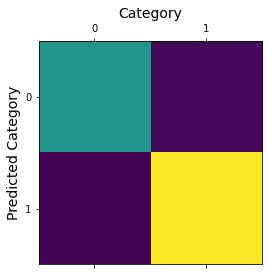

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       649
           1       0.98      0.96      0.97      1231

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880

59/59 - 0s - loss: 0.1292 - accuracy: 0.9559 - 95ms/epoch - 2ms/step
Test Loss: 0.1292363703250885
Test Accuracy: 0.9558510780334473


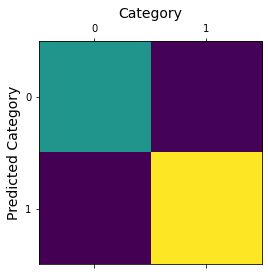

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       664
           1       0.97      0.96      0.97      1216

    accuracy                           0.96      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.96      0.96      0.96      1880

59/59 - 0s - loss: 0.1776 - accuracy: 0.9362 - 119ms/epoch - 2ms/step
Test Loss: 0.1776052564382553
Test Accuracy: 0.936170220375061


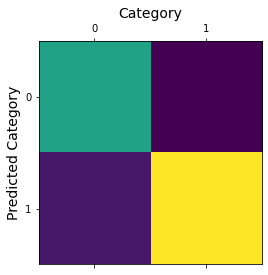

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       747
           1       0.92      0.98      0.95      1133

    accuracy                           0.94      1880
   macro avg       0.94      0.93      0.93      1880
weighted avg       0.94      0.94      0.94      1880

59/59 - 0s - loss: 0.1303 - accuracy: 0.9569 - 91ms/epoch - 2ms/step
Test Loss: 0.13033001124858856
Test Accuracy: 0.9569149017333984


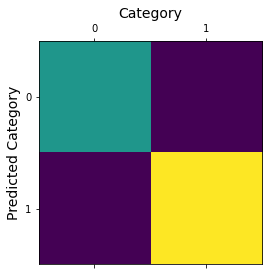

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       672
           1       0.97      0.97      0.97      1208

    accuracy                           0.96      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.96      0.96      0.96      1880

59/59 - 0s - loss: 0.1328 - accuracy: 0.9559 - 92ms/epoch - 2ms/step
Test Loss: 0.13281965255737305
Test Accuracy: 0.9558510780334473


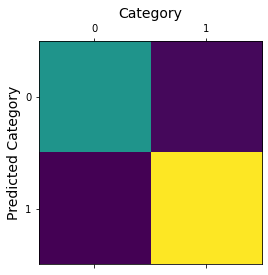

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       650
           1       0.98      0.96      0.97      1230

    accuracy                           0.96      1880
   macro avg       0.95      0.96      0.95      1880
weighted avg       0.96      0.96      0.96      1880

59/59 - 0s - loss: 0.1342 - accuracy: 0.9559 - 89ms/epoch - 2ms/step
Test Loss: 0.13416001200675964
Test Accuracy: 0.9558510780334473


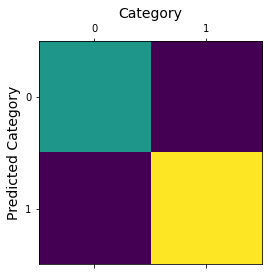

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       676
           1       0.97      0.97      0.97      1204

    accuracy                           0.96      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.96      0.96      0.96      1880



In [12]:
for m in ms:
    test_loss, test_acc = m.evaluate(X_test,  y_test, verbose=2)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)

    y_pred = np.argmax(m.predict(X_test), axis=-1)
    plt.matshow(confusion_matrix(y_test, y_pred, labels=[0,1]))
    plt.ylabel("Predicted Category", fontsize=14)
    plt.title("Category", fontsize=14)
    plt.show()
    print(classification_report(y_pred,y_test))

In [ ]:
for i in range(len(hs)):
    plt.plot(hs[i].history['accuracy'], label='accuracy')
    plt.plot(hs[i].history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    print("a")


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('../feature_data/features.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X = df.drop(["label"],axis=1)
X = X.drop(["radius"],axis=1)
cols = X.keys()

#normalize data
X = preprocessing.normalize(X, norm='max')

#labels
y = df["label"]
#idx = y == 0
#y[idx]=-1

X = pd.DataFrame(X, columns = cols)

X['label'] = y

#features
X = pd.DataFrame(X, columns = cols)



X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.3)


from sklearn.svm import OneClassSVM,SVC

rf= SVC(kernel = "poly", C=2000,verbose=True)

rf.fit(X_train,y_train)

predictions= rf.predict(X_test)
print(predictions[0:10])


from sklearn.metrics import classification_report, confusion_matrix


print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))